# Определение перспективного тарифа для телеком-компании

Заказчик исследования - федеральный оператор сотовой связи. Задача: какой из тарифных планов, предложенных клиентам, "Смарт" или "Ультра", приносит больше прибыли. Тредуется проанализировать поведение клиентов и на этой основе выяснить какой тариф лучше. 

## 1. Изучение данных из файлов

In [1]:
# загрузим все требуемые библиотеки 
import pandas as pd
import numpy as np
import matplotlib as plt
from math import sqrt
from scipy import stats as st

In [2]:
users = pd.read_csv('/datasets/users.csv')
display(users)
users.info()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [3]:
calls = pd.read_csv('/datasets/calls.csv')
display(calls)
calls.info()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [4]:
messages = pd.read_csv('/datasets/messages.csv')
display(messages)
messages.info()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [5]:
tariffs = pd.read_csv('/datasets/tariffs.csv')
display(tariffs)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [6]:
internet = pd.read_csv('/datasets/internet.csv')
display(internet)
internet.info()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


**Вывод**

Получили данные в виде пяти таблиц:
- users: id пользователя, возраст, дата завершения тарифа, город, имя, фамилия, дата регистрации и тариф. Для дальнейшего исследования потребуются только номер id, город, даты старта и конца тарифа и сам тариф.
- calls: расширенный id  пользователя (так как у каждого пользователя может быть какое угодно количество звонков, то добавляется к id пользователя номер звонка, получается, например 1005_7, где 1005 - это id пользователя, а 7 - номер звонка),	дата звонка, его длительность и id пользователя. Для исследования потребуются все столбцы.
- messages: расширенный id пользователя, дата отправки сообщения, id пользователя. Все данные понадобятся.
- internet: Unnamed: 0	- ошибочный столбец, который дублирует номера строк, его в дальнейшем можно удалить, расширенный id пользователя, количество использованных мегабайт за одну интернет-сессию, дата интернет-сессии, id пользователя. Кроме столбца unnamed:0 остальные данные также потребуются.
- tariffs: маленькая таблица с расценками тарифов: сколько включено сообщений в абоненствую плату, сколько включено мегабайт в абонентствую плату, сколько включено минут, абонентская плата в месяц, стоимость гигабайта сверх тарифа, стоимость сообщения сверх тарифа, стоимость минуты сверх тарифа, название тарифа. Все данные потребуются, с помощью них будем расчитывать выручку по каждому пользователю за каждый месяц использования тарифа

## 2. Предобработка данных и добавление новых в таблицу

***2.1 Исправление ошибок***

*2.1.1 USERS*

In [7]:
# исправим ошибки в таблице users
display(users.isna().sum())

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

В таблице users пропуски есть только в столбце churn_date, но их нужно сохранить, так как они означают, что на момент выгрузки тариф еще действовал

In [8]:
print(users.duplicated().sum())

0


Дубликатов не обнаружено, следовательно ошибок в таблице users нет, переходим к таблице calls

*2.1.2 CALLS*

In [9]:
# исправим ошибки в таблице calls
display(calls.isna().sum())

id           0
call_date    0
duration     0
user_id      0
dtype: int64

In [10]:
print(calls.duplicated().sum())

0


Дубликатов не обнаружено, следовательно ошибок в таблице calls нет, переходим к таблице messages

*2.1.3 MESSAGES*

In [11]:
# исправим ошибки в таблице calls
display(messages.isna().sum())

id              0
message_date    0
user_id         0
dtype: int64

In [12]:
print(messages.duplicated().sum())

0


Дубликатов не обнаружено, следовательно ошибок в таблице messages нет, переходим к таблице internet

*2.1.4 INTERNET*

In [13]:
# исправим ошибки в таблице calls
display(internet.isna().sum())

Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

In [14]:
print(messages.duplicated().sum())

0


Дубликатов и пропусков не обнаружено, но есть непонятный сталбец Unnamed:0, который просто дублирует столбец с номером строки, поэтому можем его удалить

In [15]:
internet = internet.loc[:, 'id':'user_id']
display(internet)

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


Изначальные таблицы приведены в порядок, теперь получим новую таблицу data из таблицы users, в которой для каждого пользователя посчитаем следующие параметры: 
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).


***2.2 Изменение типов данных***

In [16]:
# округлим кол-во минут в большую сторону и приведем к целому типу данных
calls['count_minutes'] = np.ceil(calls['duration'])
calls['count_minutes'] = calls['count_minutes'].astype('int')
display(calls)

,id,call_date,duration,user_id,count_minutes
0,1000_0,2018-07-25,0.00,1000,0
1,1000_1,2018-08-17,0.00,1000,0
2,1000_2,2018-06-11,2.85,1000,3
3,1000_3,2018-09-21,13.80,1000,14
4,1000_4,2018-12-15,5.18,1000,6
...,...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499,1
202603,1499_216,2018-10-18,18.83,1499,19
202604,1499_217,2018-11-10,10.81,1499,11
202605,1499_218,2018-10-06,4.27,1499,5


In [17]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
display(calls)
calls.info()

,id,call_date,duration,user_id,count_minutes
0,1000_0,2018-07-25,0.00,1000,0
1,1000_1,2018-08-17,0.00,1000,0
2,1000_2,2018-06-11,2.85,1000,3
3,1000_3,2018-09-21,13.80,1000,14
4,1000_4,2018-12-15,5.18,1000,6
...,...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499,1
202603,1499_216,2018-10-18,18.83,1499,19
202604,1499_217,2018-11-10,10.81,1499,11
202605,1499_218,2018-10-06,4.27,1499,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
id               202607 non-null object
call_date        202607 non-null datetime64[ns]
duration         202607 non-null float64
user_id          202607 non-null int64
count_minutes    202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 7.7+ MB


In [18]:
display(messages.head())
messages.info()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [19]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
display(messages)
messages.info()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [20]:
display(internet.head())
internet.info()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


In [21]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
display(internet)
internet.info()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.6+ MB


In [22]:
# так как пропуски в churn_date означают, что пользование тарифа еще не закончилось,
# то анализируя 2018 год, заполним пропуски 31 декабря 2018 года
users['churn_date'] = users['churn_date'].fillna('2018-12-31') 
display(users)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,2018-12-31,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,2018-12-31,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,2018-12-31,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,2018-12-31,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,2018-12-31,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,2018-12-31,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,2018-12-31,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [23]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
display(users)
users.info()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,2018-12-31,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,2018-12-31,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,2018-12-31,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,2018-12-31,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,2018-12-31,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,2018-12-31,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,2018-12-31,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    500 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


***2.3 Добавление новых данных***

In [24]:
# сначала посчитаем в таблице calls по каждому пользователю количество и общую длительность вызовов
display(calls)
calls.info()

,id,call_date,duration,user_id,count_minutes
0,1000_0,2018-07-25,0.00,1000,0
1,1000_1,2018-08-17,0.00,1000,0
2,1000_2,2018-06-11,2.85,1000,3
3,1000_3,2018-09-21,13.80,1000,14
4,1000_4,2018-12-15,5.18,1000,6
...,...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499,1
202603,1499_216,2018-10-18,18.83,1499,19
202604,1499_217,2018-11-10,10.81,1499,11
202605,1499_218,2018-10-06,4.27,1499,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
id               202607 non-null object
call_date        202607 non-null datetime64[ns]
duration         202607 non-null float64
user_id          202607 non-null int64
count_minutes    202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 7.7+ MB


In [25]:
calls['month'] = pd.DatetimeIndex(calls['call_date']).month
display(calls)

,id,call_date,duration,user_id,count_minutes,month
0,1000_0,2018-07-25,0.00,1000,0,7
1,1000_1,2018-08-17,0.00,1000,0,8
2,1000_2,2018-06-11,2.85,1000,3,6
3,1000_3,2018-09-21,13.80,1000,14,9
4,1000_4,2018-12-15,5.18,1000,6,12
...,...,...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499,1,12
202603,1499_216,2018-10-18,18.83,1499,19,10
202604,1499_217,2018-11-10,10.81,1499,11,11
202605,1499_218,2018-10-06,4.27,1499,5,10


In [26]:
# посчитаем по каждому пользователю, сколько было совершено звонков и общую длительность по месяцам
calls_grouped = calls.groupby(['user_id', 'month']).agg({'duration':'count', 'count_minutes':'sum'})
display(calls_grouped)

duration  count_minutes
user_id month                         
1000    5            22            159
        6            43            172
        7            47            340
        8            52            408
        9            58            466
...                 ...            ...
1498    10           41            247
1499    9             9             70
        10           68            449
        11           74            612
        12           69            492

[3174 rows x 2 columns]

In [27]:
calls_grouped = calls_grouped.reset_index()
display(calls_grouped)

,user_id,month,duration,count_minutes
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466
...,...,...,...,...
3169,1498,10,41,247
3170,1499,9,9,70
3171,1499,10,68,449
3172,1499,11,74,612


In [28]:
messages['month'] = pd.DatetimeIndex(messages['message_date']).month
display(messages)

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12
...,...,...,...,...
123031,1499_179,2018-12-12,1499,12
123032,1499_180,2018-09-28,1499,9
123033,1499_181,2018-09-27,1499,9
123034,1499_182,2018-11-15,1499,11


In [29]:
#  также поступим с таблицей messages
messages_grouped = messages.groupby(['user_id','month']).agg({'id':'count'})
display(messages_grouped)

id
user_id month    
1000    5      22
        6      60
        7      75
        8      81
        9      57
...            ..
1498    10     42
1499    9      11
        10     48
        11     59
        12     66

[2717 rows x 1 columns]

In [30]:
messages_grouped = messages_grouped.reset_index()
display(messages_grouped)

,user_id,month,id
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


In [31]:
internet['month'] = pd.DatetimeIndex(internet['session_date']).month
display(internet)

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9
...,...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499,10
149392,1499_153,490.13,2018-12-14,1499,12
149393,1499_154,0.00,2018-10-27,1499,10
149394,1499_155,1246.32,2018-11-26,1499,11


In [32]:
#  также поступим с таблицей messages
internet_grouped = internet.groupby(['user_id', 'month']).agg({'mb_used':'sum'})
display(internet_grouped)

mb_used
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91
...                 ...
1498    10     20579.36
1499    9       1845.75
        10     17788.51
        11     17963.31
        12     13055.58

[3203 rows x 1 columns]

In [33]:
internet_grouped = internet_grouped.reset_index()
display(internet_grouped)

,user_id,month,mb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91
...,...,...,...
3198,1498,10,20579.36
3199,1499,9,1845.75
3200,1499,10,17788.51
3201,1499,11,17963.31


In [34]:
# создадим новый датафрейм с айдишками и тарифами и 
# методом merge присоединим готовые таблицы с посчитанными минутами, смсками и трафиком
data = users.loc[:,['user_id', 'tariff', 'city']]
display(data)

,user_id,tariff,city
0,1000,ultra,Краснодар
1,1001,smart,Москва
2,1002,smart,Стерлитамак
3,1003,ultra,Москва
4,1004,ultra,Новокузнецк
...,...,...,...
495,1495,ultra,Иркутск
496,1496,smart,Вологда
497,1497,smart,Челябинск
498,1498,smart,Владикавказ


In [35]:
data = data.merge(internet_grouped, on='user_id', how='left')
display(data)

,user_id,tariff,city,month,mb_used
0,1000,ultra,Краснодар,5.0,2253.49
1,1000,ultra,Краснодар,6.0,23233.77
2,1000,ultra,Краснодар,7.0,14003.64
3,1000,ultra,Краснодар,8.0,14055.93
4,1000,ultra,Краснодар,9.0,14568.91
...,...,...,...,...,...
3201,1498,smart,Владикавказ,10.0,20579.36
3202,1499,smart,Пермь,9.0,1845.75
3203,1499,smart,Пермь,10.0,17788.51
3204,1499,smart,Пермь,11.0,17963.31


In [36]:
print(data.isna().sum())

user_id    0
tariff     0
city       0
month      3
mb_used    3
dtype: int64


In [37]:
display(data[data['month'].isna()])

,user_id,tariff,city,month,mb_used
827,1128,ultra,Волжский,NaN,NaN
1723,1273,ultra,Курган,NaN,NaN
2328,1371,smart,Омск,NaN,NaN


Несмотря на то, что у трех пользователей в month и mb_used стоят пропуски, мы не можем их удалять из общей таблицы, так как пропуски здесь означают, что в эти месяцы данные пользователи не использовали интернет, нельзя их удалаять из общей таблицы. Хоть их и не много, но незначительно на общие данные может повлиять.

In [38]:
data['user_id'].nunique()

500

In [39]:
data = data.merge(calls_grouped, on=['user_id', 'month'], how='left')
display(data)

,user_id,tariff,city,month,mb_used,duration,count_minutes
0,1000,ultra,Краснодар,5.0,2253.49,22.0,159.0
1,1000,ultra,Краснодар,6.0,23233.77,43.0,172.0
2,1000,ultra,Краснодар,7.0,14003.64,47.0,340.0
3,1000,ultra,Краснодар,8.0,14055.93,52.0,408.0
4,1000,ultra,Краснодар,9.0,14568.91,58.0,466.0
...,...,...,...,...,...,...,...
3201,1498,smart,Владикавказ,10.0,20579.36,41.0,247.0
3202,1499,smart,Пермь,9.0,1845.75,9.0,70.0
3203,1499,smart,Пермь,10.0,17788.51,68.0,449.0
3204,1499,smart,Пермь,11.0,17963.31,74.0,612.0


In [40]:
data = data.merge(messages_grouped, on=['user_id', 'month'], how='left')
display(data)

,user_id,tariff,city,month,mb_used,duration,count_minutes,id
0,1000,ultra,Краснодар,5.0,2253.49,22.0,159.0,22.0
1,1000,ultra,Краснодар,6.0,23233.77,43.0,172.0,60.0
2,1000,ultra,Краснодар,7.0,14003.64,47.0,340.0,75.0
3,1000,ultra,Краснодар,8.0,14055.93,52.0,408.0,81.0
4,1000,ultra,Краснодар,9.0,14568.91,58.0,466.0,57.0
...,...,...,...,...,...,...,...,...
3201,1498,smart,Владикавказ,10.0,20579.36,41.0,247.0,42.0
3202,1499,smart,Пермь,9.0,1845.75,9.0,70.0,11.0
3203,1499,smart,Пермь,10.0,17788.51,68.0,449.0,48.0
3204,1499,smart,Пермь,11.0,17963.31,74.0,612.0,59.0


In [41]:
data = data.rename(columns={'id': 'count_messages'})
display(data)

,user_id,tariff,city,month,mb_used,duration,count_minutes,count_messages
0,1000,ultra,Краснодар,5.0,2253.49,22.0,159.0,22.0
1,1000,ultra,Краснодар,6.0,23233.77,43.0,172.0,60.0
2,1000,ultra,Краснодар,7.0,14003.64,47.0,340.0,75.0
3,1000,ultra,Краснодар,8.0,14055.93,52.0,408.0,81.0
4,1000,ultra,Краснодар,9.0,14568.91,58.0,466.0,57.0
...,...,...,...,...,...,...,...,...
3201,1498,smart,Владикавказ,10.0,20579.36,41.0,247.0,42.0
3202,1499,smart,Пермь,9.0,1845.75,9.0,70.0,11.0
3203,1499,smart,Пермь,10.0,17788.51,68.0,449.0,48.0
3204,1499,smart,Пермь,11.0,17963.31,74.0,612.0,59.0


In [42]:
print(data.isna().sum())

user_id             0
tariff              0
city                0
month               3
mb_used             3
duration           43
count_minutes      43
count_messages    500
dtype: int64


In [43]:
data['duration'] = data['duration'].fillna(0)
data['count_minutes'] = data['count_minutes'].fillna(0)
data['count_messages'] = data['count_messages'].fillna(0)
print(data.isna().sum())
display(data)

user_id           0
tariff            0
city              0
month             3
mb_used           3
duration          0
count_minutes     0
count_messages    0
dtype: int64


,user_id,tariff,city,month,mb_used,duration,count_minutes,count_messages
0,1000,ultra,Краснодар,5.0,2253.49,22.0,159.0,22.0
1,1000,ultra,Краснодар,6.0,23233.77,43.0,172.0,60.0
2,1000,ultra,Краснодар,7.0,14003.64,47.0,340.0,75.0
3,1000,ultra,Краснодар,8.0,14055.93,52.0,408.0,81.0
4,1000,ultra,Краснодар,9.0,14568.91,58.0,466.0,57.0
...,...,...,...,...,...,...,...,...
3201,1498,smart,Владикавказ,10.0,20579.36,41.0,247.0,42.0
3202,1499,smart,Пермь,9.0,1845.75,9.0,70.0,11.0
3203,1499,smart,Пермь,10.0,17788.51,68.0,449.0,48.0
3204,1499,smart,Пермь,11.0,17963.31,74.0,612.0,59.0


In [44]:
# переведем мегабайты в гигабайты и округлим до целого числа в столбце mb_used
data['mb_used'] = data['mb_used'] / 1024
data['mb_used'] = np.ceil(data['mb_used'])
display(data)

,user_id,tariff,city,month,mb_used,duration,count_minutes,count_messages
0,1000,ultra,Краснодар,5.0,3.0,22.0,159.0,22.0
1,1000,ultra,Краснодар,6.0,23.0,43.0,172.0,60.0
2,1000,ultra,Краснодар,7.0,14.0,47.0,340.0,75.0
3,1000,ultra,Краснодар,8.0,14.0,52.0,408.0,81.0
4,1000,ultra,Краснодар,9.0,15.0,58.0,466.0,57.0
...,...,...,...,...,...,...,...,...
3201,1498,smart,Владикавказ,10.0,21.0,41.0,247.0,42.0
3202,1499,smart,Пермь,9.0,2.0,9.0,70.0,11.0
3203,1499,smart,Пермь,10.0,18.0,68.0,449.0,48.0
3204,1499,smart,Пермь,11.0,18.0,74.0,612.0,59.0


In [45]:
# переименуем столбец mb_used в gb_used
data = data.rename(columns={'mb_used': 'gb_used'})
display(data)

,user_id,tariff,city,month,gb_used,duration,count_minutes,count_messages
0,1000,ultra,Краснодар,5.0,3.0,22.0,159.0,22.0
1,1000,ultra,Краснодар,6.0,23.0,43.0,172.0,60.0
2,1000,ultra,Краснодар,7.0,14.0,47.0,340.0,75.0
3,1000,ultra,Краснодар,8.0,14.0,52.0,408.0,81.0
4,1000,ultra,Краснодар,9.0,15.0,58.0,466.0,57.0
...,...,...,...,...,...,...,...,...
3201,1498,smart,Владикавказ,10.0,21.0,41.0,247.0,42.0
3202,1499,smart,Пермь,9.0,2.0,9.0,70.0,11.0
3203,1499,smart,Пермь,10.0,18.0,68.0,449.0,48.0
3204,1499,smart,Пермь,11.0,18.0,74.0,612.0,59.0


Теперь с помощью функции одной строки и метода apply посчитаем с каждого пользователя помесячную выручку

In [46]:
def earnings(row):
    minutes = row['count_minutes']
    messages = row['count_messages']
    internet = row['gb_used']
    tariff = row['tariff']
    
    smart_rub_per_minutes = int(tariffs[tariffs['tariff_name']=='smart']['rub_per_minute'])
    smart_rub_per_message = int(tariffs[tariffs['tariff_name']=='smart']['rub_per_message'])
    smart_rub_per_gb = int(tariffs[tariffs['tariff_name']=='smart']['rub_per_gb'])
    smart_rub_monthly_fee = int(tariffs[tariffs['tariff_name']=='smart']['rub_monthly_fee'])
    smart_minutes_included = int(tariffs[tariffs['tariff_name']=='smart']['minutes_included'])
    smart_messages_included = int(tariffs[tariffs['tariff_name']=='smart']['messages_included'])
    smart_gb_included = int(tariffs[tariffs['tariff_name']=='smart']['mb_per_month_included']) / 1024
    
    ultra_rub_per_minutes = int(tariffs[tariffs['tariff_name']=='ultra']['rub_per_minute'])
    ultra_rub_per_message = int(tariffs[tariffs['tariff_name']=='ultra']['rub_per_message'])
    ultra_rub_per_gb = int(tariffs[tariffs['tariff_name']=='ultra']['rub_per_gb'])
    ultra_rub_monthly_fee = int(tariffs[tariffs['tariff_name']=='ultra']['rub_monthly_fee'])
    ultra_minutes_included = int(tariffs[tariffs['tariff_name']=='ultra']['minutes_included'])
    ultra_messages_included = int(tariffs[tariffs['tariff_name']=='ultra']['messages_included'])
    ultra_gb_included = int(tariffs[tariffs['tariff_name']=='ultra']['mb_per_month_included']) / 1024
    
    pay_for_minutes = 0
    pay_for_messages = 0
    pay_for_internet = 0
    

    if tariff == 'smart':
        rub_monthly_fee = smart_rub_monthly_fee
        if minutes > smart_minutes_included:
            pay_for_minutes += (minutes - smart_minutes_included) * smart_rub_per_minutes
        if messages > smart_messages_included:
            pay_for_messages += (messages - smart_messages_included) * smart_rub_per_message
        if internet > smart_gb_included:
            pay_for_internet += (internet - smart_gb_included) * smart_rub_per_gb
        
    elif tariff == 'ultra':
        rub_monthly_fee = ultra_rub_monthly_fee
        if minutes > ultra_minutes_included:
            pay_for_minutes += (minutes - ultra_minutes_included) * ultra_rub_per_minutes
        if messages > ultra_messages_included:
            pay_for_messages += (messages - ultra_messages_included) * ultra_rub_per_message
        if internet > ultra_gb_included:
            pay_for_internet += (internet - ultra_gb_included) * ultra_rub_per_gb
            
    total_pay = rub_monthly_fee + pay_for_minutes + pay_for_messages + pay_for_internet
    
    return total_pay
        
        
data['earnings'] = data.apply(earnings, axis=1)
data['earnings'] = data['earnings'].astype('int')
display(data)

,user_id,tariff,city,month,gb_used,duration,count_minutes,count_messages,earnings
0,1000,ultra,Краснодар,5.0,3.0,22.0,159.0,22.0,1950
1,1000,ultra,Краснодар,6.0,23.0,43.0,172.0,60.0,1950
2,1000,ultra,Краснодар,7.0,14.0,47.0,340.0,75.0,1950
3,1000,ultra,Краснодар,8.0,14.0,52.0,408.0,81.0,1950
4,1000,ultra,Краснодар,9.0,15.0,58.0,466.0,57.0,1950
...,...,...,...,...,...,...,...,...,...
3201,1498,smart,Владикавказ,10.0,21.0,41.0,247.0,42.0,1750
3202,1499,smart,Пермь,9.0,2.0,9.0,70.0,11.0,550
3203,1499,smart,Пермь,10.0,18.0,68.0,449.0,48.0,1150
3204,1499,smart,Пермь,11.0,18.0,74.0,612.0,59.0,1513


In [47]:
data['earnings'].agg(['min','max'])

min     550
max    6770
Name: earnings, dtype: int64

## 3. Анализ данных

Для каждого тарифа посчитаем посчитаем для кол-ва минут, продолжительности вызовов, кол-ва смс и интернет-трафика
- среднее значение
- дисперсию
- стендартное отклонение

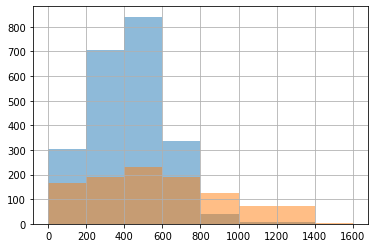

In [48]:
data[data['tariff']=='smart']['count_minutes'].hist(bins=[0,200,400,600,800,1000,1400,1600], alpha=0.5) # голубой график
data[data['tariff']=='ultra']['count_minutes'].hist(bins=[0,200,400,600,800,1000,1400,1600], alpha=0.5) # оранжевый график

count_minutes_smart скошены влево

count_minutes_ultra скошены вправо

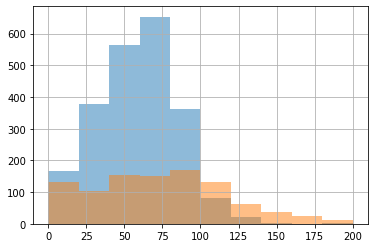

In [49]:
data[data['tariff']=='smart']['duration'].hist(bins=[0,20,40,60,80,100,120,140,160,180,200], alpha=0.5) # голубой график
data[data['tariff']=='ultra']['duration'].hist(bins=[0,20,40,60,80,100,120,140,160,180,200], alpha=0.5) # оранжевый график

duration_smart скошены влево

duration_ultra скошены вправо

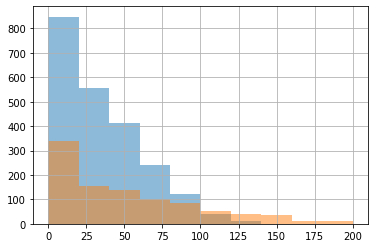

In [50]:
data[data['tariff']=='smart']['count_messages'].hist(bins=[0,20,40,60,80,100,120,140,160,180,200], alpha=0.5) # голубой график
data[data['tariff']=='ultra']['count_messages'].hist(bins=[0,20,40,60,80,100,120,140,160,180,200], alpha=0.5) # оранжевый график

count_messages_smart скошены вправо

count_messages_ultra скошены вправо

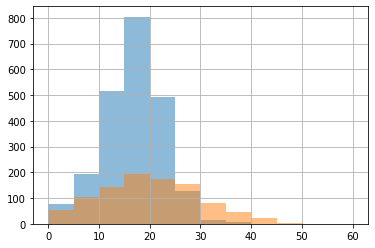

In [51]:
data[data['tariff']=='smart']['gb_used'].hist(bins=[0,5,10,15,20,25,30,35,40,45,50,55,60], alpha=0.5) # голубой график
data[data['tariff']=='ultra']['gb_used'].hist(bins=[0,5,10,15,20,25,30,35,40,45,50,55,60], alpha=0.5) # оранжевый график

gb_used_smart распределены нормально

gb_used_messages_ultra рапределены нормально

In [52]:
print('SMART')

avg_count_minutes_smart = data[data['tariff']=='smart']['count_minutes'].mean()
print('Среднее количество минут в месяц', avg_count_minutes_smart)

avg_duration_smart = data[data['tariff']=='smart']['duration'].mean()
print('Средняя продолжительность в месяц', avg_duration_smart)

avg_count_messages_smart = data[data['tariff']=='smart']['count_messages'].mean()
print('Среднее количество сообщений в месяц', avg_count_messages_smart)

avg_internet_smart = data[data['tariff']=='smart']['gb_used'].mean()
print('Средний расход интернет-трафика в месяц', avg_internet_smart)
print()
print('ULTRA')

avg_count_minutes_ultra = data[data['tariff']=='ultra']['count_minutes'].mean()
print('Среднее количество минут в месяц', avg_count_minutes_ultra)

avg_duration_ultra = data[data['tariff']=='ultra']['duration'].mean()
print('Средняя продолжительность в месяц', avg_duration_ultra)

avg_count_messages_ultra = data[data['tariff']=='ultra']['count_messages'].mean()
print('Среднее количество сообщений в месяц', avg_count_messages_ultra)

avg_internet_ultra = data[data['tariff']=='ultra']['gb_used'].mean()
print('Средний расход интернет-трафика в месяц', avg_internet_ultra)

SMART
Среднее количество минут в месяц 417.9125168236877
Средняя продолжительность в месяц 58.46164199192463
Среднее количество сообщений в месяц 33.3835800807537
Средний расход интернет-трафика в месяц 16.33617594254937

ULTRA
Среднее количество минут в месяц 528.6653019447288
Средняя продолжительность в месяц 73.64073694984647
Среднее количество сообщений в месяц 49.48413510747185
Средний расход интернет-трафика в месяц 19.694358974358973


In [53]:
print('SMART')

var_count_minutes_smart = np.var(data[data['tariff']=='smart']['count_minutes'])
print('Дисперсия количества минут в месяц', var_count_minutes_smart)

var_duration_smart = np.var(data[data['tariff']=='smart']['duration'])
print('Дисперсия продолжительности в месяц', var_duration_smart)

var_count_messages_smart = np.var(data[data['tariff']=='smart']['count_messages'])
print('Дисперсия количества сообщений в месяц', var_count_messages_smart)

var_internet_smart = np.var(data[data['tariff']=='smart']['gb_used'])
print('Дисперсия расхода интернет-трафика в месяц', var_internet_smart)

print()

print('ULTRA')

var_count_minutes_ultra = np.var(data[data['tariff']=='ultra']['count_minutes'])
print('Дисперсия количества минут в месяц', var_count_minutes_ultra)

var_duration_ultra = np.var(data[data['tariff']=='ultra']['duration'])
print('Дисперсия продолжительности в месяц', var_duration_ultra)

var_count_messages_ultra = np.var(data[data['tariff']=='ultra']['count_messages'])
print('Дисперсия количества сообщений в месяц', var_count_messages_ultra)

var_internet_ultra = np.var(data[data['tariff']=='ultra']['gb_used'])
print('Дисперсия расхода интернет-трафика в месяц', var_internet_ultra)

SMART
Дисперсия количества минут в месяц 36220.694455262725
Дисперсия продолжительности в месяц 672.7770167744771
Дисперсия количества сообщений в месяц 796.4849883494642
Дисперсия расхода интернет-трафика в месяц 32.908978554322495

ULTRA
Дисперсия количества минут в месяц 101147.34857086584
Дисперсия продолжительности в месяц 1935.998872742473
Дисперсия количества сообщений в месяц 2299.8792262990437
Дисперсия расхода интернет-трафика в месяц 94.05017330703484


In [54]:
print('SMART')

str_count_minutes_smart = sqrt(var_count_minutes_smart)
print('Стандартное отклонение количества минут в месяц', str_count_minutes_smart)

str_duration_smart = sqrt(var_duration_smart)
print('Стандартное отклонение продолжительности в месяц', str_duration_smart)

str_count_messages_smart = sqrt(var_count_messages_smart)
print('Стандартное отклонение количества сообщений в месяц', str_count_messages_smart)

str_internet_smart = sqrt(var_internet_smart)
print('Стандартное отклонение расхода интернет-трафика в месяц', str_internet_smart)

print()

print('ULTRA')

str_count_minutes_ultra = sqrt(var_count_minutes_ultra)
print('Стандартное отклонение количества минут в месяц', str_count_minutes_ultra)

str_duration_ultra = sqrt(var_duration_ultra)
print('Стандартное отклонение продолжительности в месяц', str_duration_ultra)

str_count_messages_ultra = sqrt(var_count_messages_ultra)
print('Стандартное отклонение количества сообщений в месяц', str_count_messages_ultra)

str_internet_ultra = sqrt(var_internet_ultra)
print('Стандартное отклонение расхода интернет-трафика в месяц', str_internet_ultra)

SMART
Стандартное отклонение количества минут в месяц 190.3173519552611
Стандартное отклонение продолжительности в месяц 25.93794550026037
Стандартное отклонение количества сообщений в месяц 28.222065628678994
Стандартное отклонение расхода интернет-трафика в месяц 5.73663477609674

ULTRA
Стандартное отклонение количества минут в месяц 318.036709470567
Стандартное отклонение продолжительности в месяц 43.999987190253506
Стандартное отклонение количества сообщений в месяц 47.95705606372272
Стандартное отклонение расхода интернет-трафика в месяц 9.697946860394463


In [55]:
# посчитаем, скольк человек и какой процент от общего количества в тарифе smart превышают абонентскую плату, 
# аналогично поступим и с тарифом ultra
smart_rub_monthly_fee = int(tariffs[tariffs['tariff_name']=='smart']['rub_monthly_fee'])
count_smart = data[data['tariff']=='smart']['user_id'].count()
count_smart_excess = data[(data['earnings']>smart_rub_monthly_fee)&(data['tariff']=='smart')]['user_id'].count()
percent_smart_excess = count_smart_excess / count_smart * 100
print('Общее количество пользователей тарифа smart:', count_smart)
print('Количество пользователей тарифа smart с превышением абонентской платы:', count_smart_excess)
print('Процент пользователей тарифа smart, превышающий абонентской платы:', percent_smart_excess)
print('Средняя переплата по тарифу smart', data[(data['earnings']>smart_rub_monthly_fee)&(data['tariff']=='smart')]['earnings'].mean() - smart_rub_monthly_fee)

Общее количество пользователей тарифа smart: 2229
Количество пользователей тарифа smart с превышением абонентской платы: 1662
Процент пользователей тарифа smart, превышающий абонентской платы: 74.56258411843876
Средняя переплата по тарифу smart 992.4193742478942


In [56]:
ultra_rub_monthly_fee = int(tariffs[tariffs['tariff_name']=='ultra']['rub_monthly_fee'])
count_ultra = data[data['tariff']=='ultra']['user_id'].count()
count_ultra_excess = data[(data['earnings']>ultra_rub_monthly_fee)&(data['tariff']=='ultra')]['user_id'].count()
percent_ultra_excess = count_ultra_excess / count_ultra * 100
print('Общее количество пользователей тарифа ultra:', count_ultra)
print('Количество пользователей тарифа ultra с превышением абонентской платы:', count_ultra_excess)
print('Процент пользователей тарифа ultra, превышающий абонентской платы:', percent_ultra_excess)
print('Средняя переплата по тарифу ultra', data[(data['earnings']>ultra_rub_monthly_fee)&(data['tariff']=='ultra')]['earnings'].mean() - ultra_rub_monthly_fee)

Общее количество пользователей тарифа ultra: 977
Количество пользователей тарифа ultra с превышением абонентской платы: 134
Процент пользователей тарифа ultra, превышающий абонентской платы: 13.715455475946776
Средняя переплата по тарифу ultra 883.2089552238808


Здесь хорошо видно, что процент переплачивающий пользователей по тарифу smart очень велик: почти 75%! А в тарифе ultra всего 14%. То есть пользователям smart со средней переплатой в почти 1000 рублей невыгодно быть на этом тарифе, так как в среднем их 1500 рублей - это почти тариф ultra, но в ultra сильно больше включено и минут, и сообщений, и интернета, поэтому на мой взгляд выгоднее брать тариф ultra тем пользователям, кто регулярно выходят их абонентской платы. А для самого поставщика связи так же выгоднее, если большинство пользователей приобретут ultra, так как выручка вырастет за счет самой высокой абонентской платы.

## 4. Формулирование и проверка гипотез

Сформулируем нулевую гипотезу Н0: "Средняя выручка пользователей тарифов «Ультра» и «Смарт» равны". Сформулируем альтернативную гипотезу Н1: "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются".
Для этого получим два отдельных датасета с тарифами ultra и smart

In [57]:
data_smart = data[data['tariff']=='smart']
data_ultra = data[data['tariff']=='ultra']
display(data_smart)
display(data_ultra)

,user_id,tariff,city,month,gb_used,duration,count_minutes,count_messages,earnings
8,1001,smart,Москва,11.0,18.0,59.0,430.0,0.0,1150
9,1001,smart,Москва,12.0,14.0,63.0,414.0,0.0,550
10,1002,smart,Стерлитамак,6.0,11.0,15.0,117.0,4.0,550
11,1002,smart,Стерлитамак,7.0,18.0,26.0,214.0,11.0,1150
12,1002,smart,Стерлитамак,8.0,20.0,42.0,289.0,13.0,1550
...,...,...,...,...,...,...,...,...,...
3201,1498,smart,Владикавказ,10.0,21.0,41.0,247.0,42.0,1750
3202,1499,smart,Пермь,9.0,2.0,9.0,70.0,11.0,550
3203,1499,smart,Пермь,10.0,18.0,68.0,449.0,48.0,1150
3204,1499,smart,Пермь,11.0,18.0,74.0,612.0,59.0,1513


,user_id,tariff,city,month,gb_used,duration,count_minutes,count_messages,earnings
0,1000,ultra,Краснодар,5.0,3.0,22.0,159.0,22.0,1950
1,1000,ultra,Краснодар,6.0,23.0,43.0,172.0,60.0,1950
2,1000,ultra,Краснодар,7.0,14.0,47.0,340.0,75.0,1950
3,1000,ultra,Краснодар,8.0,14.0,52.0,408.0,81.0,1950
4,1000,ultra,Краснодар,9.0,15.0,58.0,466.0,57.0,1950
...,...,...,...,...,...,...,...,...,...
3178,1495,ultra,Иркутск,8.0,3.0,17.0,92.0,13.0,1950
3179,1495,ultra,Иркутск,9.0,33.0,112.0,813.0,82.0,2400
3180,1495,ultra,Иркутск,10.0,29.0,152.0,1030.0,82.0,1950
3181,1495,ultra,Иркутск,11.0,39.0,129.0,954.0,79.0,3300


In [58]:
avg_earnings_smart = data_smart['earnings'].mean()
avg_earnings_ultra = data_ultra['earnings'].mean()
print('Средняя выручка тарифа smart:', avg_earnings_smart)
print('Средняя выручка тарифа ultra:', avg_earnings_ultra)

Средняя выручка тарифа smart: 1289.9735307312696
Средняя выручка тарифа ultra: 2071.136131013306


In [59]:
# теперь выполним этот с помощью метода ttest_ind (так как две разные выборки и их размеры неравны)
list_earnings_smart = []
for i in data_smart['earnings']:
    list_earnings_smart.append(i)

list_earnings_ultra = []
for i in data_ultra['earnings']:
    list_earnings_ultra.append(i)
    
alpha = 0.05 # критический уровень статистической значимости

results = st.ttest_ind(list_earnings_smart, list_earnings_ultra)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 9.59472004286221e-160
Отвергаем нулевую гипотезу


Действительно, средние значения по двум выборкам отличаются. То есть, отвергаем гипотезу H1. Далее переходим к альтернативной гипотезе Н1 "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются". Причем, как видно из расчитаных средних выручек, выручка по тарифу ultra больше. Подтверждается, как и в пункте 3, в выводе.

Сформулируем нулевую гипотезу Н0: "Средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов". Сформулируем альтернативную гипотезу Н1: "Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов" Для этого снова создадим два новых датафрейма для пользователей Москвы и регионов.

In [60]:
display(data)

,user_id,tariff,city,month,gb_used,duration,count_minutes,count_messages,earnings
0,1000,ultra,Краснодар,5.0,3.0,22.0,159.0,22.0,1950
1,1000,ultra,Краснодар,6.0,23.0,43.0,172.0,60.0,1950
2,1000,ultra,Краснодар,7.0,14.0,47.0,340.0,75.0,1950
3,1000,ultra,Краснодар,8.0,14.0,52.0,408.0,81.0,1950
4,1000,ultra,Краснодар,9.0,15.0,58.0,466.0,57.0,1950
...,...,...,...,...,...,...,...,...,...
3201,1498,smart,Владикавказ,10.0,21.0,41.0,247.0,42.0,1750
3202,1499,smart,Пермь,9.0,2.0,9.0,70.0,11.0,550
3203,1499,smart,Пермь,10.0,18.0,68.0,449.0,48.0,1150
3204,1499,smart,Пермь,11.0,18.0,74.0,612.0,59.0,1513


In [61]:
data_moscow = data[data['city']=='Москва']
data_region = data[data['city']!='Москва']
display(data_moscow)
display(data_region)

,user_id,tariff,city,month,gb_used,duration,count_minutes,count_messages,earnings
8,1001,smart,Москва,11.0,18.0,59.0,430.0,0.0,1150
9,1001,smart,Москва,12.0,14.0,63.0,414.0,0.0,550
17,1003,ultra,Москва,8.0,9.0,55.0,380.0,37.0,1950
18,1003,ultra,Москва,9.0,13.0,134.0,961.0,91.0,1950
19,1003,ultra,Москва,10.0,15.0,108.0,855.0,83.0,1950
...,...,...,...,...,...,...,...,...,...
3150,1490,smart,Москва,8.0,17.0,45.0,346.0,50.0,950
3151,1490,smart,Москва,9.0,15.0,44.0,322.0,48.0,550
3152,1490,smart,Москва,10.0,21.0,42.0,312.0,45.0,1750
3153,1490,smart,Москва,11.0,19.0,38.0,282.0,47.0,1350


,user_id,tariff,city,month,gb_used,duration,count_minutes,count_messages,earnings
0,1000,ultra,Краснодар,5.0,3.0,22.0,159.0,22.0,1950
1,1000,ultra,Краснодар,6.0,23.0,43.0,172.0,60.0,1950
2,1000,ultra,Краснодар,7.0,14.0,47.0,340.0,75.0,1950
3,1000,ultra,Краснодар,8.0,14.0,52.0,408.0,81.0,1950
4,1000,ultra,Краснодар,9.0,15.0,58.0,466.0,57.0,1950
...,...,...,...,...,...,...,...,...,...
3201,1498,smart,Владикавказ,10.0,21.0,41.0,247.0,42.0,1750
3202,1499,smart,Пермь,9.0,2.0,9.0,70.0,11.0,550
3203,1499,smart,Пермь,10.0,18.0,68.0,449.0,48.0,1150
3204,1499,smart,Пермь,11.0,18.0,74.0,612.0,59.0,1513


In [62]:
avg_earnings_moscow = data_moscow['earnings'].mean()
avg_earnings_region = data_region['earnings'].mean()
print('Средняя выручка пользователей из Москвы:', avg_earnings_moscow)
print('Средняя выручка пользователей из регионов:', avg_earnings_region)

Средняя выручка пользователей из Москвы: 1546.7135842880523
Средняя выручка пользователей из регионов: 1523.6258188824663


Здесь видно, что средние значения очень близки. Проверим это методом ttest_ind, так как выборки разные по размеру 

In [63]:
list_earnings_moscow = []
for i in data_moscow['earnings']:
    list_earnings_moscow.append(i)

list_earnings_region = []
for i in data_region['earnings']:
    list_earnings_region.append(i)
    
alpha = 0.05 # критический уровень статистической значимости

results = st.ttest_ind(list_earnings_moscow, list_earnings_region)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5205499977256178
Не получилось отвергнуть нулевую гипотезу


**Вывод**

Не получилось отвергнуть нулевую гипотезу, что средние значения выручек по двум тарифам равны, так как они очень близки. Это же сходится и по расчитаным средним значениям, которые отличаются всего на 23 рубля.

## 5. Общий вывод

**Цель проекта: тобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег,**
а также проанализировать поведение клиентов и определить, какой тариф лучше, smart или ultra. 

Были **получены данные** по двум тарифам: 
- данные о клиентах (их имена, города проживания, даты старта и приостановления тарифа, сам тариф), 
- данные об их звонках (количество звонков, их длительность и дата совершения вызова), 
- данные о сообщениях (количество и дата), 
- данные об использования интернета (количество потраченных мегабайт за сессию, даты интернет-сессий и их длительность),
- данные о самих тарифах (абонентская плата, стоимость минут, смс и интернета сверхтарифа, сколько минут, смс и гигабайт включено в тариф)


По каждой таблице была проведена **предобработка данных**:

- Были обнаружены пропуски в таблице users, в столбце churn_date, но их сохранили, так как они означают, что на момент выгрузки тариф еще действовал
- Дубликатов и пропусков не было обнаружено в таблицах calls, messanges и internet, но есть непонятный столбец Unnamed:0 в таблице internet, который просто дублирует столбец с номером строки, поэтому он был удален.
- так как в тарифах минута считается с первой секунды, например, вызов 2 минуты 2 секунды приравнивается к 3 минутам, то в таблице calls сначала откруглили всю длительность вверх до получения целого количества минут, а далее уже суммировали все длительности и получали общий расход по минутам в месяц. 
- в таблице internet были указаны мегабайты, их просуммировали, перевели в гигабайты (разделили на 1024) и округлили вверх до целого количества гигабайтов по такому же принципу, как поступили и со звонками.

Далее был создан **новый датафрейм** методом merge:

Изначальные таблицы приведены в порядок, теперь получим новую таблицу data из таблицы users, в которой для каждого пользователя посчитаем следующие параметры: 
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

**Общие цифры:**
- Почти 75% пользователей тарифа smart переплачивают основную абоненствую плату, причем средняя переплата составляет почти 1000 рублей
- Только 14% пользователей тарифа ultra переплачивают абоненствую плату, и средняя переплата составляет 880 рублей. 

Таким образом, можно сделать **вывод**, что тариф ultra лучше, чем тариф smart, 75 процентов пользователей тарифа smart, на мой взгляд, будут заинтересованы в переходе на другой тариф. Поэтому, корректируя рекламный бюджет, упор стоит сделать на тариф ultra, он принесет подрядчику связи бо́льшую выручку, нежели тариф smart.